In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [86]:
!pip install yellowbrick --user

In [2]:
## https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

In [3]:
import pandas as pd

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)

In [5]:
train_path = "/content/drive/MyDrive/Colab Notebooks/ds_projects/data/BankChurners.csv"
data = pd.read_csv(train_path)

In [6]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.00,0,4716.00,2.17,816,28,2.50,0.00,0.00,1.00


In [7]:
data = data.rename(columns= {
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "mon_1_prob",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "mon_2_prob"
})

In [8]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'mon_1_prob', 'mon_2_prob'],
      dtype='object')

In [9]:
data.shape

(10127, 23)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


In [11]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
mon_1_prob                  0
mon_2_prob                  0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
data = data.drop(["CLIENTNUM"], axis=1)

In [14]:
numerical_columns = []
categorical_columns = []
for column in data.columns:
  if data[column].dtype == "object":
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

In [15]:
numerical_columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'mon_1_prob',
 'mon_2_prob']

In [16]:
categorical_columns

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [17]:
data["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [18]:
data["Marital_Status"].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [19]:
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [20]:
numeric_data = data[numerical_columns]
attrition_labels = data['Attrition_Flag']

In [21]:
numeric_data.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mon_1_prob,mon_2_prob
0,45,3,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0.00,1.00
1,49,5,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0.00,1.00
2,51,3,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,1.00
3,40,4,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,40,3,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00,0.00,1.00


#### Convert Labels to numeric

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()
attrition_labels_numeric = label_encoder.fit_transform(attrition_labels)

In [24]:
attrition_labels_numeric

array([1, 1, 1, ..., 0, 0, 0])

### Kmeans Model - No Preprocessing


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
kmeans = KMeans(random_state=123, n_clusters=2, n_init="auto").fit(numeric_data)

In [27]:
clusters = kmeans.labels_

In [28]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [29]:
numeric_data["cluster"] = clusters

<ipython-input-29-f73170c081da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data["cluster"] = clusters


In [30]:
numeric_data["labels"] = attrition_labels_numeric

<ipython-input-30-265ff6515b25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data["labels"] = attrition_labels_numeric


In [31]:
silhoute_average = silhouette_score(numeric_data, clusters)
print(f"Average Silhoute Score: {silhoute_average}")

Average Silhoute Score: 0.7088292461359795


In [32]:
clusters[0:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

In [33]:
attrition_labels_numeric[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
numeric_data[numeric_data.cluster == 0]["labels"].value_counts()

1    6986
0    1376
Name: labels, dtype: int64

In [35]:
numeric_data[numeric_data.cluster == 1]["labels"].value_counts()

1    1514
0     251
Name: labels, dtype: int64

### Change cluster from 0 to 1 because of data - Manual Process
Since label is already present, adjusting 0 to 1 to compute metrics

In [36]:
cluster_map = {1: 0, 0:1}
numeric_data["new_cluster"] = numeric_data["cluster"].map(cluster_map)

<ipython-input-36-a02873ccfbab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data["new_cluster"] = numeric_data["cluster"].map(cluster_map)


### Classification Report

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(numeric_data["new_cluster"], numeric_data["labels"]))

              precision    recall  f1-score   support

           0       0.15      0.14      0.15      1765
           1       0.82      0.84      0.83      8362

    accuracy                           0.71     10127
   macro avg       0.49      0.49      0.49     10127
weighted avg       0.71      0.71      0.71     10127



### Try with Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(numeric_data[numerical_columns])

In [41]:
X

array([[-0.16540558,  0.50336813,  0.38462088, ..., -0.77588223,
        -0.43775381,  0.43776313],
       [ 0.33357038,  2.04319867,  1.01071482, ..., -0.61627565,
        -0.43785397,  0.43784526],
       [ 0.58305837,  0.50336813,  0.00896451, ..., -0.99715499,
        -0.43795193,  0.43795476],
       ...,
       [-0.29014957, -1.03646242,  0.00896451, ..., -0.99715499,
         2.29379027, -2.29379495],
       [-2.03656544, -0.26654715,  0.00896451, ..., -0.99715499,
         2.29058727, -2.29057684],
       [-0.41489356, -0.26654715, -1.36844216, ..., -0.31157218,
         2.29034089, -2.2903503 ]])

In [42]:
kmeans_scaled = KMeans(random_state=123, n_clusters=2, n_init="auto").fit(X)

In [43]:
scaled_clusters = kmeans_scaled.labels_

In [44]:
numeric_data["scaled_clusters"] = scaled_clusters

<ipython-input-44-7be53b158da2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data["scaled_clusters"] = scaled_clusters


In [45]:
cluster_map = {1: 0, 0:1}
numeric_data["scaled_clusters"] = numeric_data["scaled_clusters"].map(cluster_map)

<ipython-input-45-b605428dd94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data["scaled_clusters"] = numeric_data["scaled_clusters"].map(cluster_map)


In [46]:
silhoute_average = silhouette_score(numeric_data[numerical_columns], numeric_data["scaled_clusters"])
print(f"Average Silhoute Score: {silhoute_average}")

Average Silhoute Score: -0.01040284219404666


In [47]:
print(classification_report(numeric_data["scaled_clusters"], numeric_data["labels"]))
silhoute_average = silhouette_score(X, numeric_data["scaled_clusters"])
print(f"Average Silhoute Score: {silhoute_average}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    8500.0
           1       0.00      0.00      0.00    1627.0

    accuracy                           0.00   10127.0
   macro avg       0.00      0.00      0.00   10127.0
weighted avg       0.00      0.00      0.00   10127.0

Average Silhoute Score: 0.2403763944503944


In [48]:
numeric_data.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mon_1_prob,mon_2_prob,cluster,labels,new_cluster,scaled_clusters
0,45,3,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0.00,1.00,0,1,1,0
1,49,5,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0.00,1.00,0,1,1,0
2,51,3,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,1.00,0,1,1,0


## Comparison of Clusters with Old Model

In [49]:
comparison = []
for column in numerical_columns:
  desc_1 = numeric_data[numeric_data["new_cluster"] == 1][column].describe()
  desc_2 = numeric_data[numeric_data["new_cluster"] == 0][column].describe()
  comparison.append(
      [
          column, desc_1["mean"], desc_2["mean"], desc_1["max"], desc_2["max"], desc_1["min"], desc_2["min"], desc_1["50%"], desc_2["50%"]
      ]
  )

In [50]:
comparison_df = pd.DataFrame(comparison, columns = ["column", "c_1_mean", "c_2_mean", "c_1_max", "c_2_max", "c_1_min", "c_2_min", "c_1_50%", "c_2_50%"])

In [51]:
comparison_df

,column,c_1_mean,c_2_mean,c_1_max,c_2_max,c_1_min,c_2_min,c_1_50%,c_2_50%
0,Customer_Age,46.33,46.32,73.00,65.00,26.00,26.00,46.00,46.00
1,Dependent_count,2.31,2.52,5.00,5.00,0.00,0.00,2.00,3.00
2,Months_on_book,35.92,35.95,56.00,56.00,13.00,13.00,36.00,36.00
3,Total_Relationship_Count,3.85,3.63,6.00,6.00,1.00,1.00,4.00,4.00
4,Months_Inactive_12_mon,2.35,2.31,6.00,6.00,0.00,0.00,2.00,2.00
5,Contacts_Count_12_mon,2.45,2.50,6.00,6.00,0.00,0.00,2.00,2.00
6,Credit_Limit,4962.11,26018.47,16156.00,34516.00,1438.30,14746.00,3502.50,25188.00
7,Total_Revolving_Bal,1161.54,1168.87,2517.00,2517.00,0.00,0.00,1275.00,1284.00
8,Avg_Open_To_Buy,3800.58,24849.60,14979.00,34516.00,3.00,13632.00,2348.00,24028.00
9,Total_Amt_Chng_Q4_Q1,0.76,0.76,3.40,3.35,0.00,0.00,0.73,0.74


### Following columns seems to have different values within clusters
* Credit_Limit
* Avg_Open_To_Buy

## Comparison of Clusters with Scaled Model

In [52]:
comparison = []
for column in numerical_columns:
  desc_1 = numeric_data[numeric_data["scaled_clusters"] == 1][column].describe()
  desc_2 = numeric_data[numeric_data["scaled_clusters"] == 0][column].describe()
  comparison.append(
      [
          column, desc_1["mean"], desc_2["mean"], desc_1["max"], desc_2["max"], desc_1["min"], desc_2["min"], desc_1["50%"], desc_2["50%"]
      ]
  )

In [53]:
comparison_df = pd.DataFrame(comparison, columns = ["column", "c_1_mean", "c_2_mean", "c_1_max", "c_2_max", "c_1_min", "c_2_min", "c_1_50%", "c_2_50%"])

In [54]:
comparison_df

,column,c_1_mean,c_2_mean,c_1_max,c_2_max,c_1_min,c_2_min,c_1_50%,c_2_50%
0,Customer_Age,46.66,46.26,68.00,73.00,26.00,26.00,47.00,46.00
1,Dependent_count,2.40,2.34,5.00,5.00,0.00,0.00,2.00,2.00
2,Months_on_book,36.18,35.88,56.00,56.00,13.00,13.00,36.00,36.00
3,Total_Relationship_Count,3.28,3.91,6.00,6.00,1.00,1.00,3.00,4.00
4,Months_Inactive_12_mon,2.69,2.27,6.00,6.00,0.00,0.00,3.00,2.00
5,Contacts_Count_12_mon,2.97,2.36,6.00,5.00,0.00,0.00,3.00,2.00
6,Credit_Limit,8136.04,8726.88,34516.00,34516.00,1438.30,1438.30,4178.00,4643.50
7,Total_Revolving_Bal,672.82,1256.60,2517.00,2517.00,0.00,0.00,0.00,1364.00
8,Avg_Open_To_Buy,7463.22,7470.27,34516.00,34516.00,3.00,15.00,3488.00,3469.50
9,Total_Amt_Chng_Q4_Q1,0.69,0.77,1.49,3.40,0.00,0.26,0.70,0.74


### Clearly following columns have different values for clusters
* Total_Revolving_Bal
* Total_Trans_Amt
* Total_Trans_Ct
* Total_Ct_Chng_Q4_Q1
* Avg_Utilization_Ratio
* mon_1_prob
* mon_2_prob

In [55]:
numeric_data[numeric_data["scaled_clusters"] == 1]["Total_Revolving_Bal"].describe()

count   1627.00
mean     672.82
std      921.39
min        0.00
25%        0.00
50%        0.00
75%     1303.50
max     2517.00
Name: Total_Revolving_Bal, dtype: float64

In [56]:
numeric_data[numeric_data["scaled_clusters"] == 0]["Total_Revolving_Bal"].describe()

count   8500.00
mean    1256.60
std      757.75
min        0.00
25%      800.00
50%     1364.00
75%     1807.00
max     2517.00
Name: Total_Revolving_Bal, dtype: float64

In [57]:
numeric_data[numeric_data["scaled_clusters"] == 1]["mon_1_prob"].describe()

count   1627.00
mean       0.99
std        0.00
min        0.95
25%        0.99
50%        1.00
75%        1.00
max        1.00
Name: mon_1_prob, dtype: float64

In [58]:
numeric_data[numeric_data["scaled_clusters"] == 0]["mon_1_prob"].describe()

count   8500.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: mon_1_prob, dtype: float64

## DBSCAN

In [121]:
from sklearn.cluster import DBSCAN

In [122]:
db_scan_model = DBSCAN(eps=3, min_samples=10, metric="euclidean").fit(X)
numeric_data["cluster_dbscan"] = db_scan_model.labels_
numeric_data["cluster_dbscan"].value_counts()

 0    8442
 1    1607
-1      78
Name: cluster_dbscan, dtype: int64

In [123]:
db_scan_labels = db_scan_model.labels_
n_clusters_ = len(set(db_scan_labels)) - (1 if -1 in db_scan_labels else 0)
n_noise_ = list(db_scan_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 78


In [124]:
numeric_data["cluster_dbscan"].value_counts()

 0    8442
 1    1607
-1      78
Name: cluster_dbscan, dtype: int64

In [125]:
cluster_map = {1: 0, 0:1, -1:-1}
numeric_data["cluster_dbscan"] = numeric_data["cluster_dbscan"].map(cluster_map)

In [126]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
def cluster_metrics(X, labels_true, labels):
  print(classification_report(labels_true, labels))
  print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
  print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
  print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
  print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
  print(
      "Adjusted Mutual Information:"
      f" {adjusted_mutual_info_score(labels_true, labels):.3f}"
  )
  print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

In [127]:
numeric_data["cluster_dbscan"]

0        1
1       -1
2       -1
3       -1
4       -1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: cluster_dbscan, Length: 10127, dtype: int64

In [128]:
cluster_metrics(X, numeric_data["labels"], numeric_data["cluster_dbscan"])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.99      0.99      1627
           1       1.00      0.99      1.00      8500

    accuracy                           0.99     10127
   macro avg       0.67      0.66      0.66     10127
weighted avg       1.00      0.99      1.00     10127

Homogeneity: 0.990
Completeness: 0.907
V-measure: 0.947
Adjusted Rand Index: 0.974
Adjusted Mutual Information: 0.947
Silhouette Coefficient: 0.240


In [129]:
cluster_metrics(X, numeric_data["labels"], numeric_data["scaled_clusters"])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1627.0
           1       0.00      0.00      0.00    8500.0

    accuracy                           0.00   10127.0
   macro avg       0.00      0.00      0.00   10127.0
weighted avg       0.00      0.00      0.00   10127.0

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.240


In [67]:
cluster_metrics(X, numeric_data["labels"], numeric_data["new_cluster"])

              precision    recall  f1-score   support

           0       0.14      0.15      0.15      1627
           1       0.84      0.82      0.83      8500

    accuracy                           0.71     10127
   macro avg       0.49      0.49      0.49     10127
weighted avg       0.72      0.71      0.72     10127

Homogeneity: 0.001
Completeness: 0.001
V-measure: 0.001
Adjusted Rand Index: -0.014
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.170


## Without probability features (WP)

In [68]:
numeric_data

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mon_1_prob,mon_2_prob,cluster,labels,new_cluster,scaled_clusters,cluster_dbscan
0,45,3,39,5,1,3,12691.00,777,11914.00,1.33,...,42,1.62,0.06,0.00,1.00,0,1,1,0,1
1,49,5,44,6,1,2,8256.00,864,7392.00,1.54,...,33,3.71,0.10,0.00,1.00,0,1,1,0,0
2,51,3,36,4,1,0,3418.00,0,3418.00,2.59,...,20,2.33,0.00,0.00,1.00,0,1,1,0,0
3,40,4,34,3,4,1,3313.00,2517,796.00,1.41,...,20,2.33,0.76,0.00,1.00,0,1,1,0,0
4,40,3,21,5,1,0,4716.00,0,4716.00,2.17,...,28,2.50,0.00,0.00,1.00,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.00,1851,2152.00,0.70,...,117,0.86,0.46,0.00,1.00,0,1,1,0,1
10123,41,2,25,4,2,3,4277.00,2186,2091.00,0.80,...,69,0.68,0.51,1.00,0.00,0,0,1,1,0
10124,44,1,36,5,3,4,5409.00,0,5409.00,0.82,...,60,0.82,0.00,1.00,0.00,0,0,1,1,0
10125,30,2,36,4,3,3,5281.00,0,5281.00,0.54,...,62,0.72,0.00,1.00,0.00,0,0,1,1,0


In [69]:
X1 = numeric_data[numerical_columns].drop(["mon_1_prob", "mon_2_prob"], axis=1)
kmeans_wp = KMeans(random_state=123, n_clusters=2, n_init="auto").fit(X1)

In [70]:
numeric_data["cluster_wp"] = kmeans_wp.labels_

In [71]:
numeric_data["cluster_wp"].value_counts()

0    8362
1    1765
Name: cluster_wp, dtype: int64

In [72]:
cluster_map = {1: 0, 0:1}
numeric_data["cluster_wp"] = numeric_data["cluster_wp"].map(cluster_map)

In [73]:
numeric_data["cluster_wp"].value_counts()

1    8362
0    1765
Name: cluster_wp, dtype: int64

In [74]:
cluster_metrics(X1, numeric_data["labels"], numeric_data["cluster_wp"])

              precision    recall  f1-score   support

           0       0.14      0.15      0.15      1627
           1       0.84      0.82      0.83      8500

    accuracy                           0.71     10127
   macro avg       0.49      0.49      0.49     10127
weighted avg       0.72      0.71      0.72     10127

Homogeneity: 0.001
Completeness: 0.001
V-measure: 0.001
Adjusted Rand Index: -0.014
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.709


## Scaler

In [75]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [76]:
X1_scaled

array([[-1.65405580e-01,  5.03368127e-01,  3.84620878e-01, ...,
        -9.73895182e-01,  3.83400260e+00, -7.75882235e-01],
       [ 3.33570383e-01,  2.04319867e+00,  1.01071482e+00, ...,
        -1.35734038e+00,  1.26085729e+01, -6.16275655e-01],
       [ 5.83058365e-01,  5.03368127e-01,  8.96451285e-03, ...,
        -1.91120566e+00,  6.80786367e+00, -9.97154993e-01],
       ...,
       [-2.90149571e-01, -1.03646242e+00,  8.96451285e-03, ...,
        -2.07004789e-01,  4.44305026e-01, -9.97154993e-01],
       [-2.03656544e+00, -2.66547146e-01,  8.96451285e-03, ...,
        -1.21794745e-01,  4.10696270e-02, -9.97154993e-01],
       [-4.14893562e-01, -2.66547146e-01, -1.36844216e+00, ...,
        -1.64399767e-01, -2.65557291e-01, -3.11572183e-01]])

In [77]:
kmeans_wp_scaled = KMeans(random_state=123, n_clusters=2, n_init="auto").fit(X1_scaled)

In [78]:
numeric_data["cluster_wp_scaled"] = kmeans_wp_scaled.labels_

In [79]:
numeric_data["cluster_wp_scaled"].value_counts()

1    5224
0    4903
Name: cluster_wp_scaled, dtype: int64

In [80]:
cluster_metrics(X1_scaled, numeric_data["labels"], numeric_data["cluster_wp_scaled"])

              precision    recall  f1-score   support

           0       0.09      0.27      0.13      1627
           1       0.77      0.47      0.59      8500

    accuracy                           0.44     10127
   macro avg       0.43      0.37      0.36     10127
weighted avg       0.66      0.44      0.51     10127

Homogeneity: 0.043
Completeness: 0.027
V-measure: 0.033
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.033
Silhouette Coefficient: 0.117


In [81]:
from sklearn.preprocessing import Normalizer

In [82]:
normal_scaler = Normalizer()
X1_scaled_normal = normal_scaler.fit_transform(X1)

In [83]:
kmeans_wp_scaled_norm = KMeans(random_state=123, n_clusters=2, n_init="auto").fit(X1_scaled_normal)

In [84]:
numeric_data["cluster_wp_scaled_normal"] = kmeans_wp_scaled_norm.labels_

In [87]:
numeric_data["cluster_wp_scaled_normal"].value_counts()

0    5310
1    4817
Name: cluster_wp_scaled_normal, dtype: int64

In [88]:
cluster_metrics(X1, numeric_data["labels"], numeric_data["cluster_wp_scaled_normal"])

              precision    recall  f1-score   support

           0       0.19      0.61      0.29      1627
           1       0.87      0.49      0.63      8500

    accuracy                           0.51     10127
   macro avg       0.53      0.55      0.46     10127
weighted avg       0.76      0.51      0.57     10127

Homogeneity: 0.006
Completeness: 0.004
V-measure: 0.005
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.005
Silhouette Coefficient: 0.285


## With DBSCAN Model

In [89]:
db_scan_model_scaled = DBSCAN(eps=3, min_samples=10, metric="euclidean").fit(X1_scaled)
numeric_data["cluster_dbscan_scaled"] = db_scan_model_scaled.labels_
numeric_data["cluster_dbscan_scaled"].value_counts()

 0    10063
-1       64
Name: cluster_dbscan_scaled, dtype: int64

In [90]:
db_scan_model_scaled = DBSCAN(eps=3, min_samples=3, metric="euclidean").fit(X1_scaled)
numeric_data["cluster_dbscan_scaled"] = db_scan_model_scaled.labels_
numeric_data["cluster_dbscan_scaled"].value_counts()

 0    10092
-1       32
 1        3
Name: cluster_dbscan_scaled, dtype: int64

In [91]:
db_scan_model_scaled_norm = DBSCAN(eps=3, min_samples=10, metric="euclidean").fit(X1_scaled_normal)
numeric_data["cluster_dbscan_scaled_norm"] = db_scan_model_scaled_norm.labels_
numeric_data["cluster_dbscan_scaled_norm"].value_counts()

0    10127
Name: cluster_dbscan_scaled_norm, dtype: int64

## Different Model

In [92]:
db_scan_model_scaled_norm = DBSCAN(eps=3, min_samples=10).fit(X1_scaled_normal)
numeric_data["cluster_dbscan_scaled_norm"] = db_scan_model_scaled_norm.labels_
numeric_data["cluster_dbscan_scaled_norm"].value_counts()

0    10127
Name: cluster_dbscan_scaled_norm, dtype: int64

In [93]:
db_scan_model_scaled_norm = DBSCAN(eps=3, min_samples=2).fit(X1_scaled)
numeric_data["cluster_dbscan_scaled_norm"] = db_scan_model_scaled_norm.labels_
numeric_data["cluster_dbscan_scaled_norm"].value_counts()

 0    10092
-1       30
 1        3
 2        2
Name: cluster_dbscan_scaled_norm, dtype: int64

In [94]:
cluster_metrics(X1_scaled, numeric_data["labels"], numeric_data["cluster_dbscan_scaled_norm"])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.16      1.00      0.28      1627
           1       1.00      0.00      0.00      8500
           2       0.00      0.00      0.00         0

    accuracy                           0.16     10127
   macro avg       0.29      0.25      0.07     10127
weighted avg       0.87      0.16      0.05     10127

Homogeneity: 0.000
Completeness: 0.004
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.418


In [95]:
cluster_metrics(X1_scaled, numeric_data["labels"], numeric_data["cluster_dbscan_scaled"])

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.16      1.00      0.28      1627
           1       1.00      0.00      0.00      8500

    accuracy                           0.16     10127
   macro avg       0.39      0.33      0.09     10127
weighted avg       0.87      0.16      0.05     10127

Homogeneity: 0.000
Completeness: 0.002
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Silhouette Coefficient: 0.418


Silhouete Visualizer

In [97]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

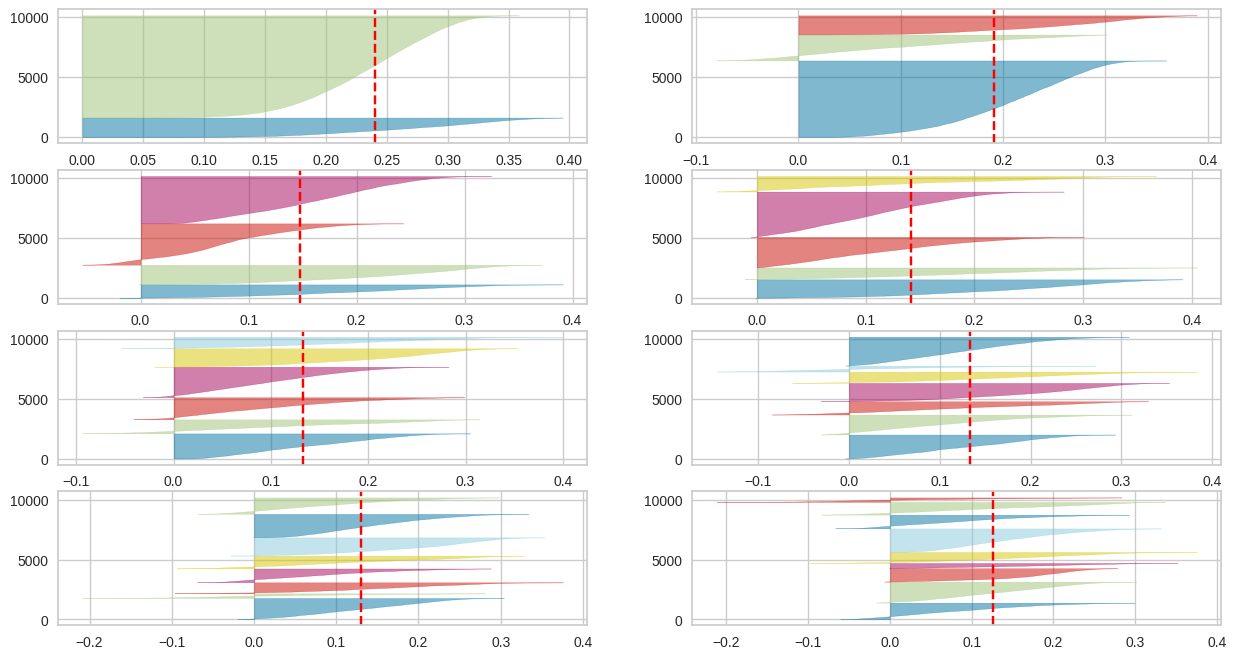

In [98]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

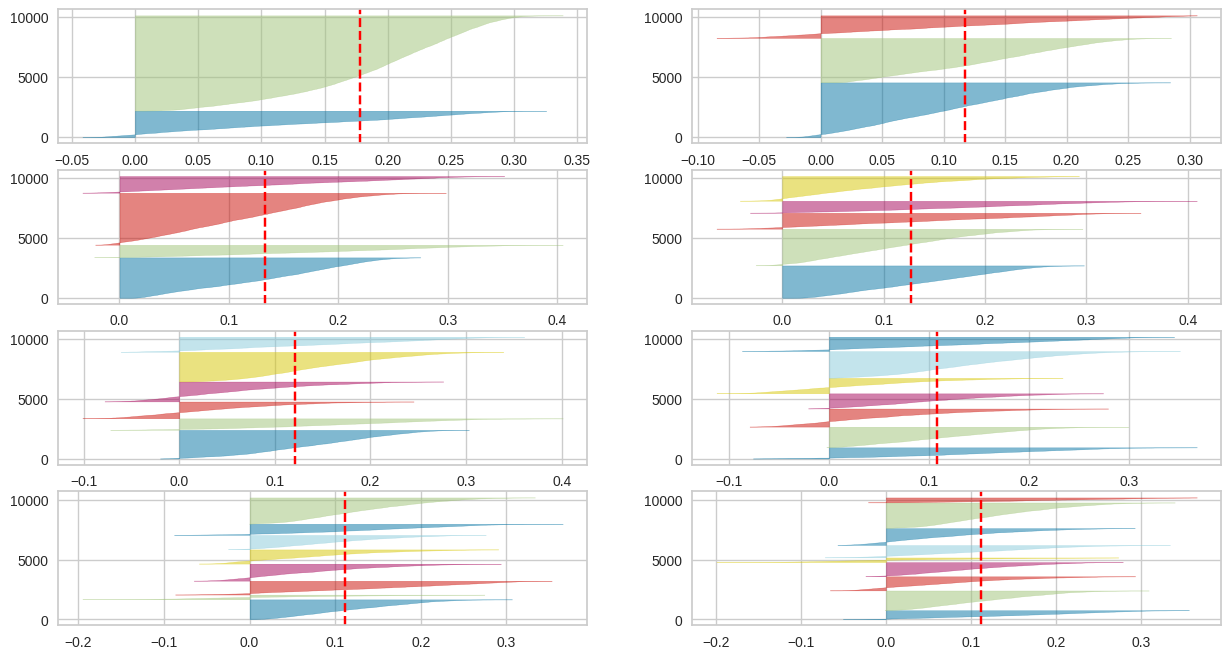

In [100]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X1_scaled)

### BIRCH Model

In [101]:
from sklearn.cluster import Birch

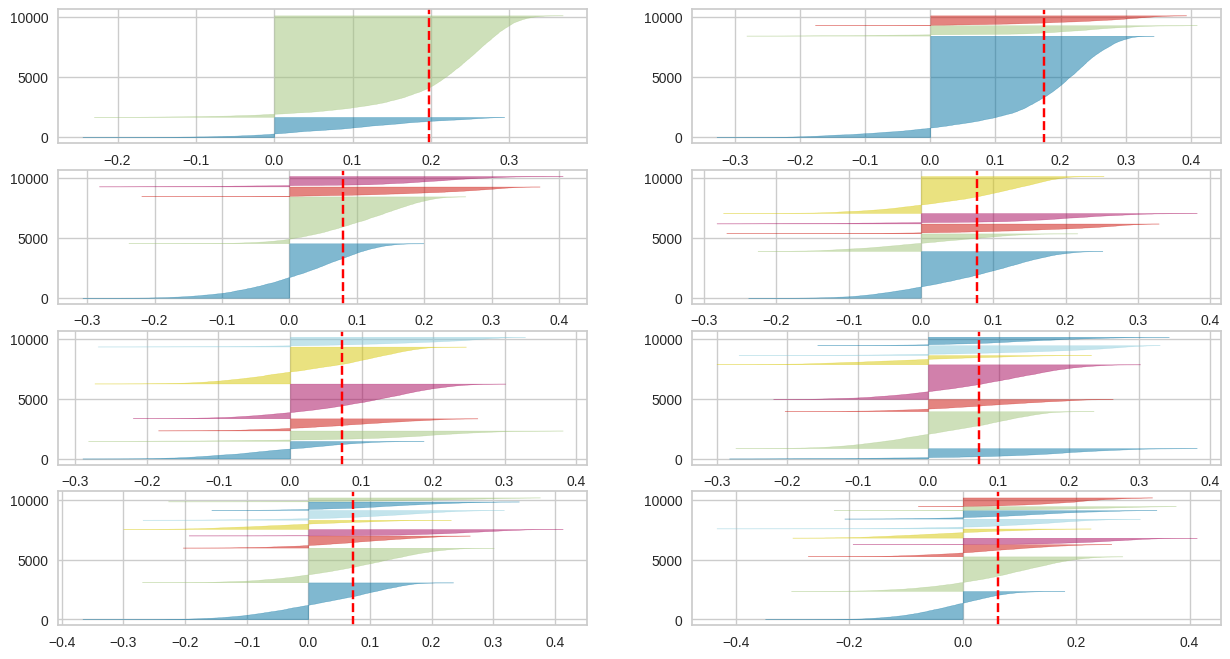

In [102]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    birch_model = Birch(threshold=0.03, branching_factor = 50, n_clusters = i)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(birch_model, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X1_scaled)

### Based on all above - seems like 2 cluster is better